In [1]:
from math import cos, sin, pi, exp
from typing import Tuple
from matplotlib import pyplot as plt
import numpy as np
from solver import brent_d

### Реализованный алгоритм одномерной оптимизации
В качестве алгоритма я взял алгоритм Брента с использованием первой производной.
Однако я слегка модифицировал его: на моих тестах стабильно лучший результат показывала
реализация, где мы аппроксимируем не две параболы, а одну на каждом шаге.

Давайте протестируем, как он работает на нашей функции на разных отрезках:
на отрезке, на котором функция унимодальна и на отрезке, где она не унимодальна.

На не унимодальных функциях алгоритм должен выдавать какую-то точку локального минимума,
которая может не совпадать с точкой глобального минимума.


### Рассматриваемая функция
$f(x) = sin^3(x) + cos^3(x)$

Эта функция не унимодальна на отрезке $[0, 2\pi]$,
но унимодальна на отрезке $[1.6, 3.8]$.

Минимум этой функции находится в точке $x_{min}=\pi$ и равен $f(x_{min}) = -1$.

![f(x)](Problem12.png)

In [2]:
def f12(x: float) -> Tuple[float, float]:
    return (
        sin(x) ** 3 + cos(x) ** 3,
        3 * sin(x) * cos(x) * (sin(x) - cos(x))
    )

##### Унимодальный случай

In [3]:
x_true = pi
x_predicted, history = brent_d(f12, 1.6, 3.8, eps=1e-12)
history = np.log10(np.abs(np.array(history) - x_true))
print(f"x_true: {x_true}, x_predicted: {x_predicted}\nrelative error: {abs(x_true - x_predicted)/abs(x_true)}")

x_true: 3.141592653589793, x_predicted: 3.141592653586554
relative error: 1.0310651487375507e-12


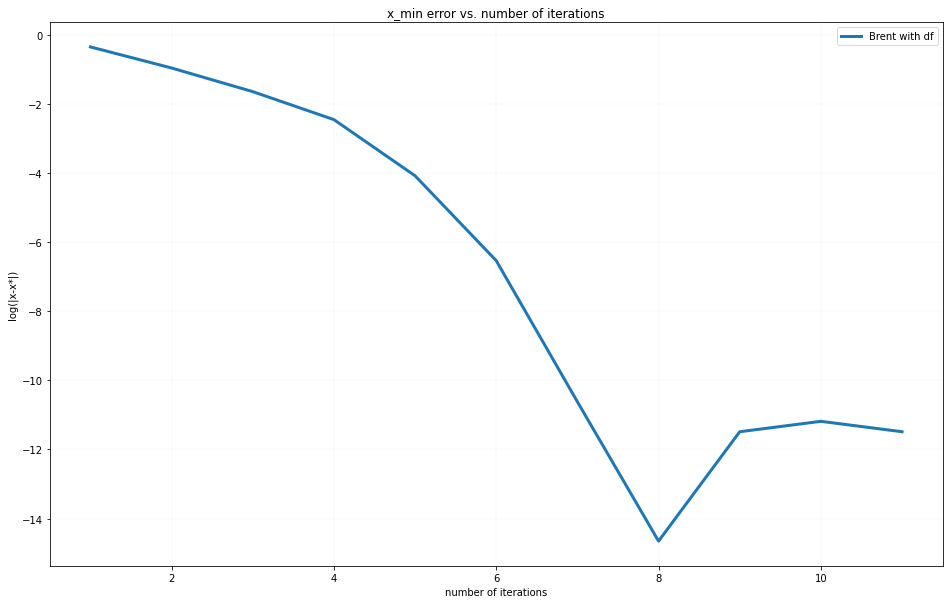

In [4]:
fig = plt.figure(figsize=[16, 10])
ax = plt.subplot()
plt.grid(linestyle='--', linewidth='0.1', color='gray', alpha=0.5)
ax.set_xlabel("number of iterations")
ax.set_ylabel("log(|x-x*|)")
ax.set_title(f"x_min error vs. number of iterations")

plt.plot(range(1, len(history)+1), history, linewidth=3, label="Brent with df")

plt.legend()
plt.show()

##### Не унимодальный случай
Сходится в ту же точку, поэтому также отрисуем график.

In [5]:
x_true = pi
x_predicted, history = brent_d(f12, 0, 6, eps=1e-12)
history = np.log10(np.abs(np.array(history) - x_true))
print(f"x_true: {x_true}, x_predicted: {x_predicted}\nrelative error: {abs(x_true - x_predicted)/abs(x_true)}")

x_true: 3.141592653589793, x_predicted: 3.14159265358657
relative error: 1.025976261247209e-12


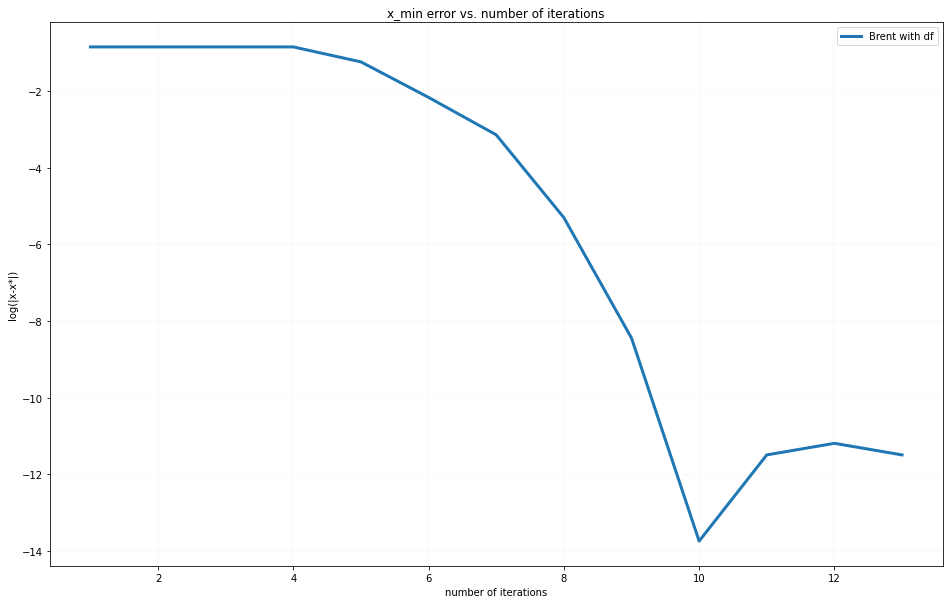

In [6]:

fig = plt.figure(figsize=[16, 10])
ax = plt.subplot()
plt.grid(linestyle='--', linewidth='0.1', color='gray', alpha=0.5)
ax.set_xlabel("number of iterations")
ax.set_ylabel("log(|x-x*|)")
ax.set_title(f"x_min error vs. number of iterations")

plt.plot(range(1, len(history)+1), history, linewidth=3, label="Brent with df")

plt.legend()
plt.show()

## Другие функции

##### Функция, на которой метод парабол работает по-началу плохо
$f(x) = -(x + sin(x))e^{-x^2}$

Эта функция унимодальна на отрезке.

Минимум этой функции находится в точке $x_{min}=0.67956$ и равен $f(x_{min}) = -0.824239$.

![f(x)](Problem06.png)

In [7]:

def f6(x: float) -> Tuple[float, float]:
    return (
        -(x + sin(x)) * exp(-x ** 2),
        exp(-x ** 2) * (2 * x ** 2 + 2 * x * sin(x) - cos(x) - 1)
    )

In [8]:
x_true = 0.67956
x_predicted, history = brent_d(f6, -10, 10, eps=1e-12)
history = np.log10(np.abs(np.array(history) - x_true))
print(f"x_true: {x_true}, x_predicted: {x_predicted}\nrelative error: {abs(x_true - x_predicted)/abs(x_true)}")

x_true: 0.67956, x_predicted: 0.6795786600191025
relative error: 2.745897213262335e-05


Относительная ошибка большая, но это связано с тем, что значение $x_{min}$ на сайте ограничено лишь 5 знаками.
Главное, что метод успешно сошелся!

Давайте посмотрим на график ошибки.

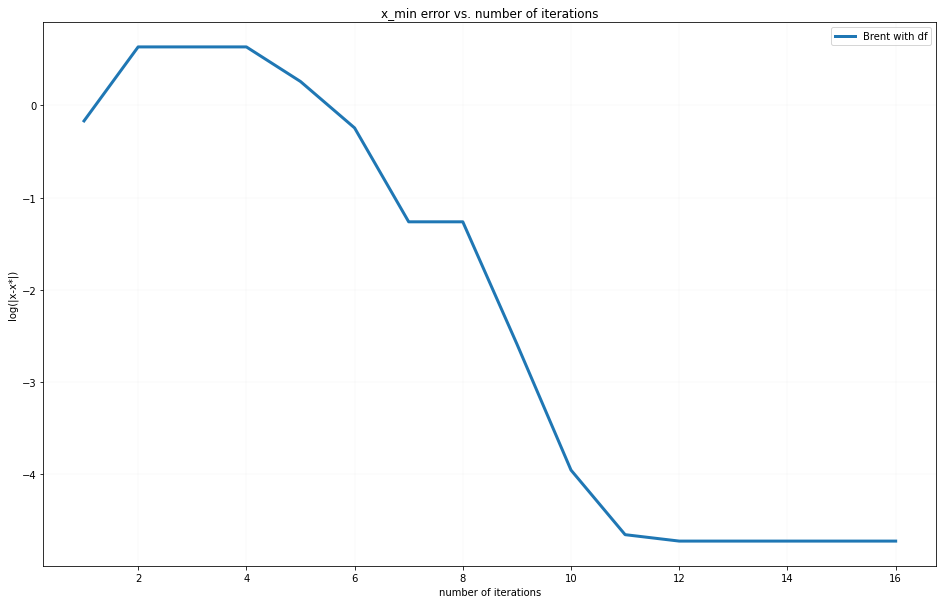

In [9]:
fig = plt.figure(figsize=[16, 10])
ax = plt.subplot()
plt.grid(linestyle='--', linewidth='0.1', color='gray', alpha=0.5)
ax.set_xlabel("number of iterations")
ax.set_ylabel("log(|x-x*|)")
ax.set_title(f"x_min error vs. number of iterations")

plt.plot(range(1, len(history)+1), history, linewidth=3, label="Brent with df")

plt.legend()
plt.show()

### Пример сходимости в не глобальный минимум
$f(x) = -e^{-x} sin(2\pi x)$

Эта функция не унимодальна на отрезке $[0, 4]$.

Минимум этой функции находится в точке $x_{min}=0.224885$ и равен $f(x_{min}) = -0.788685$.

![f(x)](Problem14.png)

In [10]:
def f14(x: float) -> Tuple[float, float]:
    return (
        -exp(-x) * sin(2*pi*x),
        exp(-x) * (sin(2 * pi * x) - 2 * pi * cos(2 * pi * x))
    )

In [11]:
x_true = 0.224885
x_predicted, history = brent_d(f14, 0, 4, eps=1e-12)
history = np.log10(np.abs(np.array(history) - x_true))
print(f"x_true: {x_true}, x_predicted: {x_predicted}\nrelative error: {abs(x_true - x_predicted)/abs(x_true)}")

x_true: 0.224885, x_predicted: 3.224880385891562
relative error: 13.34013111542149


Как видим, функция сошлась в локальный минимум, который не совпадает с глобальным.

### Заключение
Графики точности от времени работы я строить не стал, поскольку они выглядят примерно так же.
Пожалуй, стоит заметить, что реализованный алгоритм вызывает Оракула один раз за итерацию и один раз при инициализации.